# Вайтехович Игорь

<span style='color:rgb(0,12,102)'><b>1. Считайте файлы, посмотрите размеры файлов, переименуйте столбцы.</b></span>

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
def explore_dataset(file):
    data_frame = pd.read_excel(file)
    data_frame = data_frame.rename(columns=lambda c: c.lower().replace('-', '_').replace('/', '_').replace(' ', '_'))
    print("Информация для таблицы " + file+":")
    print("Размерность таблицы (число строк, число столбцов): ")
    print(data_frame.shape)
    print()
    print("Названия столбцов: ")
    print(data_frame.columns)
    print()
    print("Типы данных в столбцах: ")
    print(data_frame.dtypes)
    print("-------------------------------------------------------------------------------------------------------------------")
    return data_frame

sample_superstore = explore_dataset('sample_superstore.xlsx')
returns = explore_dataset('Returns.xlsx')
people = explore_dataset('People.xlsx')

Информация для таблицы sample_superstore.xlsx:
Размерность таблицы (число строк, число столбцов): 
(9994, 21)

Названия столбцов: 
Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country_region', 'city',
       'state', 'postal_code', 'region', 'product_id', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit'],
      dtype='object')

Типы данных в столбцах: 
row_id                     int64
order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_id               object
customer_name             object
segment                   object
country_region            object
city                      object
state                     object
postal_code              float64
region                    object
product_id                object
category                  object
sub_category            

<span style='color:rgb(0,12,102)'><b>2. Посчитайте количество уникальных отмененных order_id (будьте внимательны, так как в таблице Returns есть дубликаты order_id - можно удалить дубликаты, если есть). Посмотреть, какая Sub-Category отменялась чаще всего.</b></span>

In [8]:
returns = returns.drop_duplicates(subset = 'order_id')
returns.order_id.nunique()

296

In [9]:
returned_order_id = returns['order_id']
sample_superstore['is_returned'] = sample_superstore['order_id'].isin(list(returned_order_id))
returned_orders = sample_superstore.query('is_returned == True')
sub_category_pivot_table = pd.pivot_table(returned_orders,
               index=["sub_category"],
               values=["order_id"],
               aggfunc='count').sort_values('order_id',ascending=False).rename(columns = {'order_id':'count_of_returns'}).reset_index()
sub_category_pivot_table

,sub_category,count_of_returns
0,Binders,137
1,Paper,123
2,Phones,77
3,Furnishings,72
4,Accessories,61
5,Storage,57
6,Chairs,53
7,Art,47
8,Appliances,40
9,Tables,30


<span style='color:rgb(50,200,0)'>Заказ считается отменённым, если товар вернули. В таблице приведены в первом столбце категории товара, а во втором - число возвратов товаров каждой категории. Видно, что чаще всего отменялись заказы на категорию Binders.</span>

<span style='color:rgb(0,12,102)'><b>3. Посчитайте сумму sales и profit в разрезе региональных менеджеров, а также количество order_id только для неотмененных заказов.</b></span>

In [10]:
not_returned_orders = sample_superstore.query('is_returned == False')
print("Количество неотменённых заказов: " + str(not_returned_orders.shape[0]))
print("Количество уникальных order_id для неотменённых заказов: " + str(not_returned_orders.order_id.nunique()))

Количество неотменённых заказов: 9194
Количество уникальных order_id для неотменённых заказов: 4713


<span style='color:rgb(50,200,0)'>Добавим к каждому заказу в исходной таблице его статус (True - если отменён, False - если не отменён) и имя менеджера, который его обрабатывал.</span>

In [11]:
not_returned_orders = not_returned_orders.merge(people,on='region',how='left')
not_returned_orders = not_returned_orders.rename(columns = {'person':'manager_name'})
not_returned_orders

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country_region,city,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,is_returned,manager_name
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,False,Cassandra Brandow
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,False,Cassandra Brandow
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,False,Anna Andreadi
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,False,Cassandra Brandow
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,False,Cassandra Brandow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9189,9987,CA-2018-125794,2018-09-29,2018-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.2400,1,0.00,15.2208,False,Anna Andreadi
9190,9988,CA-2019-163629,2019-11-17,2019-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.9900,1,0.00,28.7964,False,Cassandra Brandow
9191,9989,CA-2019-163629,2019-11-17,2019-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.1000,5,0.00,55.6470,False,Cassandra Brandow
9192,9990,CA-2016-110422,2016-01-21,2016-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,False,Cassandra Brandow


In [12]:
sales_per_manager = pd.pivot_table(not_returned_orders,
               index=["manager_name"],
               values=["sales"],
               aggfunc='sum').sort_values('sales',ascending=False).reset_index()
sales_per_manager

,manager_name,sales
0,Chuck Magee,637076.0960
1,Anna Andreadi,617974.7670
2,Kelly Williams,487232.9114
3,Cassandra Brandow,374412.8080


In [13]:
profit_per_manager = pd.pivot_table(not_returned_orders,
               index=["manager_name"],
               values=["profit"],
               aggfunc='sum').sort_values('profit',ascending=False).reset_index()
profit_per_manager

,manager_name,profit
0,Anna Andreadi,88755.0711
1,Chuck Magee,86537.9794
2,Cassandra Brandow,44530.8198
3,Kelly Williams,43340.7899


<span style='color:rgb(0,12,102)'><b>4. Выберите 1 укрупненную Category (только для неотмененных заказов) по желанию и создайте таблицу в разрезе менеджеров по выбранной Category в разрезе Sub-Category с подсчетом суммарного sales и profit. Создать 2 переменные: 1 –  max сумма sales  по Sub_category для каждого менеджера; 2 –  min сумма sales  по Sub_category для каждого менеджера (! Считаем только для неотменённых заказов). Аналогично создать две переменных с min и max, но уже для метрики profit для каждого менеджера. Написать выводы, можно добавить подходящие графики.</b></span>

In [14]:
not_returned_orders.category.value_counts()

Office Supplies    5553
Furniture          1950
Technology         1691
Name: category, dtype: int64

In [15]:
office_supplies_not_returned = not_returned_orders.query('category == "Office Supplies"')
sales_of_managers_per_sub_category = pd.pivot_table(office_supplies_not_returned,
               index=["sub_category","manager_name"],
               values=["sales"],
               aggfunc='sum')
sales_of_managers_per_sub_category

sales
sub_category manager_name                
Appliances   Anna Andreadi      22024.282
             Cassandra Brandow  19033.016
             Chuck Magee        33161.686
             Kelly Williams     23183.395
Art          Anna Andreadi       8543.364
             Cassandra Brandow   4596.574
             Chuck Magee         7313.752
             Kelly Williams      5235.978
Binders      Anna Andreadi      49967.009
             Cassandra Brandow  36737.986
             Chuck Magee        52388.729
             Kelly Williams     54335.860
Envelopes    Anna Andreadi       3674.652
             Cassandra Brandow   3075.430
             Chuck Magee         4244.054
             Kelly Williams      4562.520
Fasteners    Anna Andreadi        734.646
             Cassandra Brandow    503.316
             Chuck Magee          798.094
             Kelly Williams       775.134
Labels       Anna Andreadi       4507.956
             Cassandra Brandow   2353.180
             Chuck Magee         2579.254
             Kelly Williams      2160.056
Paper        Anna Andreadi      22281.998
             Cassandra Brandow  13872.488
             Chuck Magee        18403.136
             Kelly Williams     16781.302
Storage      Anna Andreadi      62544.846
             Cassandra Brandow  34331.474
             Chuck Magee        68400.632
             Kelly Williams     43886.728
Supplies     Anna Andreadi      17122.386
             Cassandra Brandow   6564.348
             Chuck Magee        10390.526
             Kelly Williams      9400.316

In [16]:
profit_of_managers_per_sub_category = pd.pivot_table(office_supplies_not_returned,
               index=["sub_category","manager_name"],
               values=["profit"],
               aggfunc='sum')
profit_of_managers_per_sub_category

profit
sub_category manager_name                 
Appliances   Anna Andreadi       5999.1895
             Cassandra Brandow   4056.7414
             Chuck Magee         8068.8030
             Kelly Williams     -2558.3991
Art          Anna Andreadi       2182.7952
             Cassandra Brandow   1050.5562
             Chuck Magee         1854.1943
             Kelly Williams      1090.7058
Binders      Anna Andreadi      14313.1653
             Cassandra Brandow   3846.6758
             Chuck Magee        10931.7143
             Kelly Williams      2932.4853
Envelopes    Anna Andreadi       1704.8246
             Cassandra Brandow   1340.4889
             Chuck Magee         1752.1606
             Kelly Williams      1750.5757
Fasteners    Anna Andreadi        192.7837
             Cassandra Brandow    173.7181
             Chuck Magee          255.1324
             Kelly Williams       236.1480
Labels       Anna Andreadi       2038.5556
             Cassandra Brandow   1040.7723
             Chuck Magee         1120.4000
             Kelly Williams       941.5741
Paper        Anna Andreadi      10092.3194
             Cassandra Brandow   5842.6562
             Chuck Magee         8195.5269
             Kelly Williams      6685.9677
Storage      Anna Andreadi       8069.7879
             Cassandra Brandow   2102.3695
             Chuck Magee         7835.7828
             Kelly Williams      1766.4887
Supplies     Anna Andreadi        564.9391
             Cassandra Brandow    -41.4431
             Chuck Magee        -1164.6582
             Kelly Williams      -668.5931

In [17]:
max_sales_of_managers_per_sub_category = pd.pivot_table(sales_of_managers_per_sub_category,
               index=["manager_name"],
               values=["sales"],
               aggfunc='max').sort_values('sales',ascending=False).reset_index()
max_sales_of_managers_per_sub_category

,manager_name,sales
0,Chuck Magee,68400.632
1,Anna Andreadi,62544.846
2,Kelly Williams,54335.860
3,Cassandra Brandow,36737.986


In [18]:
min_sales_of_managers_per_sub_category = pd.pivot_table(sales_of_managers_per_sub_category,
               index=["manager_name"],
               values=["sales"],
               aggfunc='min').sort_values('sales',ascending=False).reset_index()
min_sales_of_managers_per_sub_category

,manager_name,sales
0,Chuck Magee,798.094
1,Kelly Williams,775.134
2,Anna Andreadi,734.646
3,Cassandra Brandow,503.316


In [19]:
max_profit_of_managers_per_sub_category = pd.pivot_table(profit_of_managers_per_sub_category,
               index=["manager_name"],
               values=["profit"],
               aggfunc='max').sort_values('profit',ascending=False).reset_index()
max_profit_of_managers_per_sub_category

,manager_name,profit
0,Anna Andreadi,14313.1653
1,Chuck Magee,10931.7143
2,Kelly Williams,6685.9677
3,Cassandra Brandow,5842.6562


In [20]:
min_profit_of_managers_per_sub_category = pd.pivot_table(profit_of_managers_per_sub_category,
               index=["manager_name"],
               values=["profit"],
               aggfunc='min').sort_values('profit',ascending=False).reset_index()
min_profit_of_managers_per_sub_category

,manager_name,profit
0,Anna Andreadi,192.7837
1,Cassandra Brandow,-41.4431
2,Chuck Magee,-1164.6582
3,Kelly Williams,-2558.3991


<span style='color:rgb(50,200,0)'>Мною была выбрана категория офисных принадлежностей. Из таблиц видно, что Anna Andreadi это единственный менеджер, у которого только положительный profit. Также этот менеджер и по профиту и по продажам всегда чаще всего занимает 1 и 2 место, нежели 3 и 4.</span>

C:\Users\yv270\AppData\Local\Temp\ipykernel_9152\3188706784.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


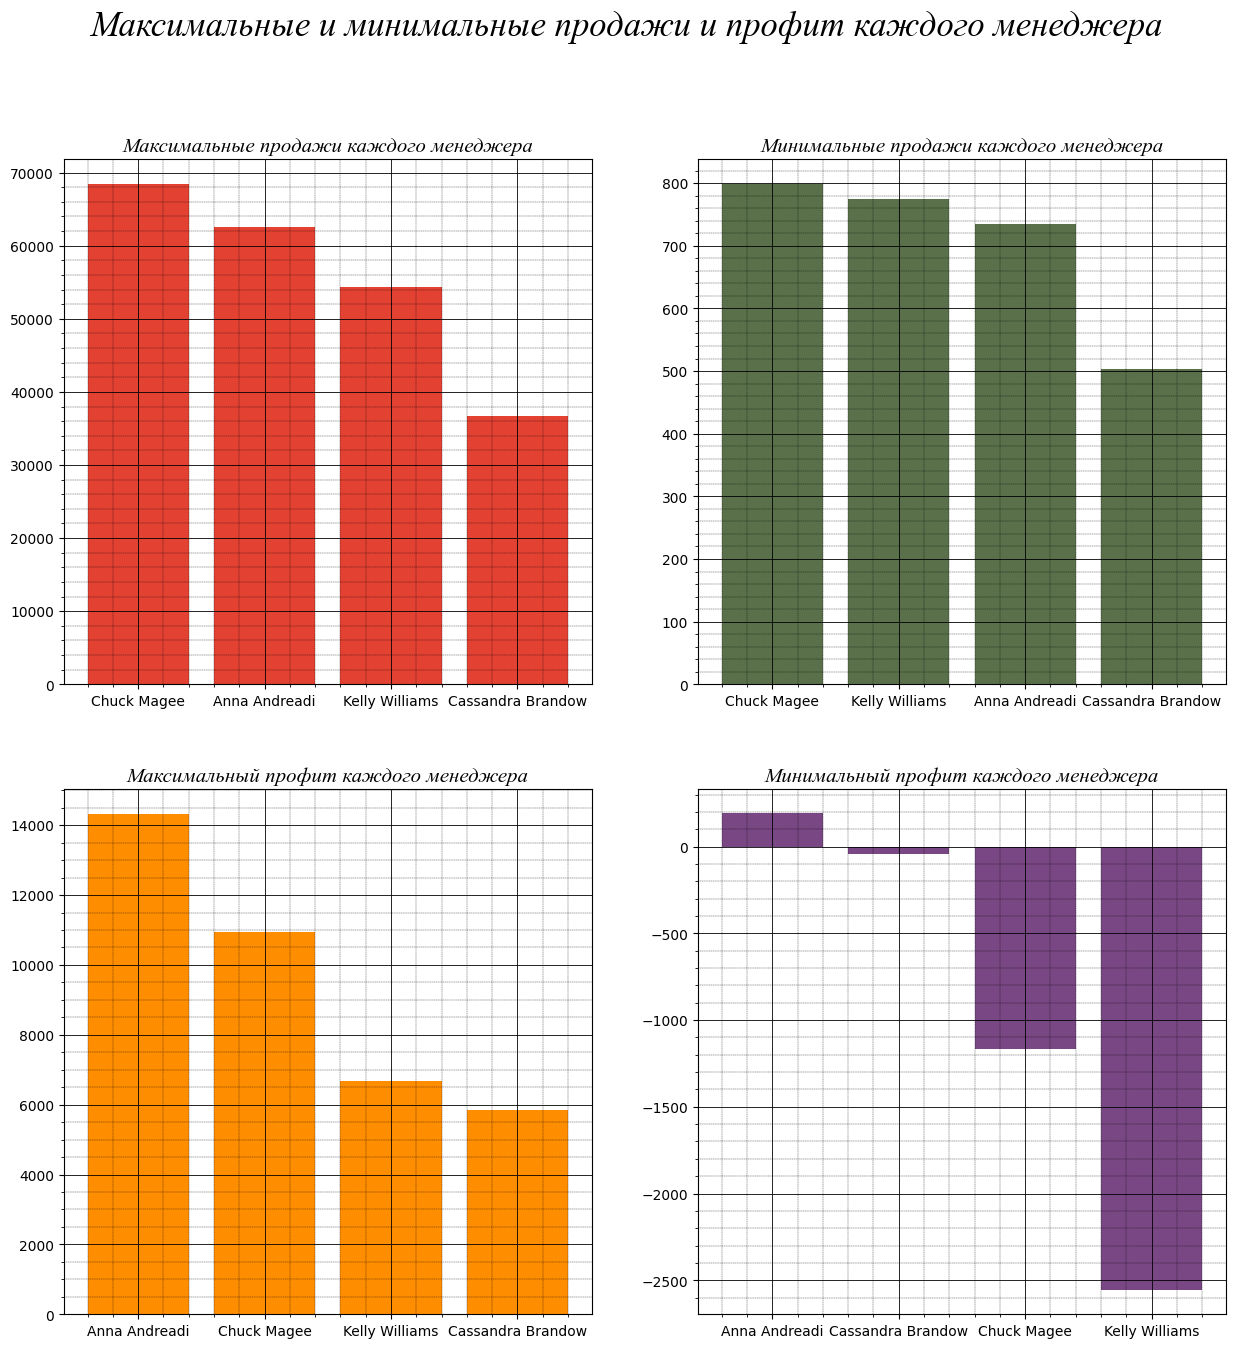

In [21]:
fig, axes = plt.subplots(2, 2,figsize = (15,15))

axes[0][0].bar(list(max_sales_of_managers_per_sub_category['manager_name']), list(max_sales_of_managers_per_sub_category['sales']),color = (227/255,65/255,50/255))
axes[0][1].bar(list(min_sales_of_managers_per_sub_category['manager_name']), list(min_sales_of_managers_per_sub_category['sales']),color = (89/255,112/255,74/255))
axes[1][0].bar(list(max_profit_of_managers_per_sub_category['manager_name']), list(max_profit_of_managers_per_sub_category['profit']),color = (255/255,141/255,0/255))
axes[1][1].bar(list(min_profit_of_managers_per_sub_category['manager_name']), list(min_profit_of_managers_per_sub_category['profit']),color = (121/255,71/255,132/255))

axes[0][0].set_title('Максимальные продажи каждого менеджера',fontfamily = 'Times New Roman',
                fontstyle = 'italic',
                fontsize = 15)
axes[0][1].set_title('Минимальные продажи каждого менеджера',fontfamily = 'Times New Roman',
                fontstyle = 'italic',
                fontsize = 15)
axes[1][0].set_title('Максимальный профит каждого менеджера',fontfamily = 'Times New Roman',
                fontstyle = 'italic',
                fontsize = 15)
axes[1][1].set_title('Минимальный профит каждого менеджера',fontfamily = 'Times New Roman',
                fontstyle = 'italic',
                fontsize = 15)
axes[0][0].minorticks_on()
axes[0][0].grid(which='major',
        color = 'black', 
        linewidth = 0.6)
axes[0][0].grid(which='minor', 
        color = 'black', 
        linestyle = '--',linewidth = 0.25)

axes[0][1].minorticks_on()
axes[0][1].grid(which='major',
        color = 'black', 
        linewidth = 0.6)
axes[0][1].grid(which='minor', 
        color = 'black', 
        linestyle = '--',linewidth = 0.25)

axes[1][0].minorticks_on()
axes[1][0].grid(which='major',
        color = 'black', 
        linewidth = 0.6)
axes[1][0].grid(which='minor', 
        color = 'black', 
        linestyle = '--',linewidth = 0.25)

axes[1][1].minorticks_on()
axes[1][1].grid(which='major',
        color = 'black', 
        linewidth = 0.6)
axes[1][1].grid(which='minor', 
        color = 'black', 
        linestyle = '--',linewidth = 0.25)
fig.suptitle('Максимальные и минимальные продажи и профит каждого менеджера',fontfamily = 'Times New Roman',
                fontstyle = 'oblique',
                fontsize = 25)
fig.show()

<span style='color:rgb(0,12,102)'><b>5. Посчитать сумму profit и sales в разрезе отмененных заказов (недополученная прибыль) и представить на круговой диаграмме процент недополученного sales (в контексте оставшегося sales)</b></span>

In [22]:
print("Сумма sales в отмененных заказах: "+str(returned_orders.sales.sum()))
print("Сумма profit в отмененных заказах: "+str(returned_orders.profit.sum()))

Сумма sales в отмененных заказах: 180504.27790000002
Сумма profit в отмененных заказах: 23232.361499999995


C:\Users\yv270\AppData\Local\Temp\ipykernel_9152\1459272921.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


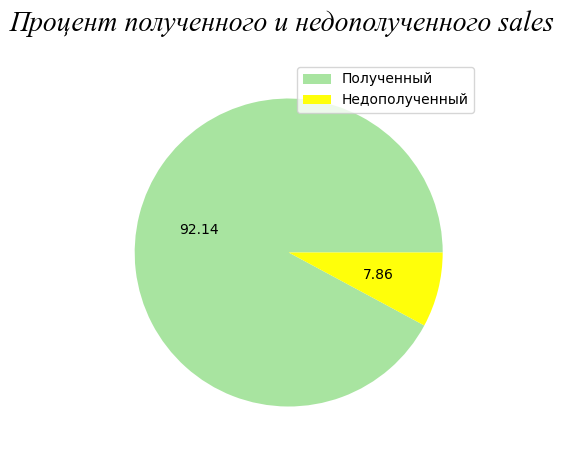

In [27]:
leg = ['Полученный','Недополученный']
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.pie([not_returned_orders.sales.sum(), returned_orders.sales.sum()],autopct="%.2f", colors=[(168/255,228/255,160/255),(255/255,255/255,10/255)])
ax.legend(leg)
fig.suptitle('Процент полученного и недополученного sales',fontfamily = 'Times New Roman',
                fontstyle = 'oblique',
                fontsize = 20)
fig.show()

<span style='color:rgb(0,12,102)'><b>6. Создать таблицу с суммой продаж в разрезе менеджеров по неотменённым заказам total_sales. Создать новый датафрейм salary со следующей информацией (2 столбца – имя менеджера и его зарплата).Данные (имена менеджеров копируйте целиком из исходной таблицы): Anna – 1500USD, Chuck – 1300USD, Kelly – 1200USD, Cassandra – 1100USD. В таблицу total_sales добавить значение зарплат менеджеров и подсчитать значение премии в разрезе каждого менеджера. Если сумма sales по менеджеру больше среднего sales  - 20%, если меньше – 5%. Добавить столбец total_salary. Построить подходящий график по столбцу total_salary в разрезе менеджеров.</b></span>

In [28]:
total_sales = pd.pivot_table(not_returned_orders,
               index=["manager_name"],
               values=["sales"],
               aggfunc='sum').sort_values('sales',ascending=False).reset_index()
total_sales

,manager_name,sales
0,Chuck Magee,637076.0960
1,Anna Andreadi,617974.7670
2,Kelly Williams,487232.9114
3,Cassandra Brandow,374412.8080


In [29]:
salary = pd.DataFrame({'manager_name': ['Anna Andreadi', 'Chuck Magee', 'Kelly Williams','Cassandra Brandow'], 'salary_in_usd': [1500, 1300, 1200,1100]})
salary

,manager_name,salary_in_usd
0,Anna Andreadi,1500
1,Chuck Magee,1300
2,Kelly Williams,1200
3,Cassandra Brandow,1100


In [30]:
total_sales = total_sales.merge(salary,on='manager_name',how='inner')
total_sales

,manager_name,sales,salary_in_usd
0,Chuck Magee,637076.0960,1300
1,Anna Andreadi,617974.7670,1500
2,Kelly Williams,487232.9114,1200
3,Cassandra Brandow,374412.8080,1100


In [31]:
total_sales['total_salary'] = np.where(total_sales.sales>total_sales.sales.mean(),1.2*total_sales.salary_in_usd,1.05*total_sales.salary_in_usd)
total_sales = total_sales.sort_values('total_salary',ascending=False)
total_sales

,manager_name,sales,salary_in_usd,total_salary
1,Anna Andreadi,617974.7670,1500,1800.0
0,Chuck Magee,637076.0960,1300,1560.0
2,Kelly Williams,487232.9114,1200,1260.0
3,Cassandra Brandow,374412.8080,1100,1155.0


C:\Users\yv270\AppData\Local\Temp\ipykernel_9152\1478800855.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


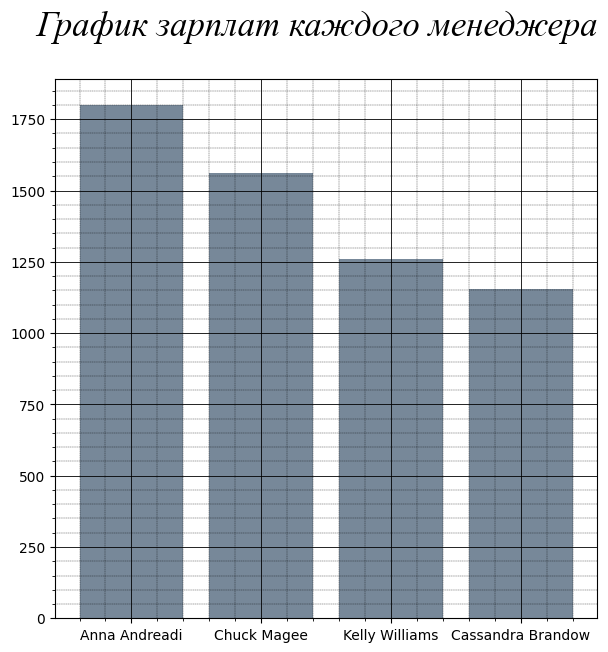

In [32]:
fig, axes = plt.subplots(1, 1,figsize = (7,7))

axes.bar(list(total_sales['manager_name']), list(total_sales['total_salary']),color = (119/255,136/255,153/255))

axes.minorticks_on()
axes.grid(which='major',
        color = 'black', 
        linewidth = 0.6)
axes.grid(which='minor', 
        color = 'black', 
        linestyle = '--',linewidth = 0.25)

fig.suptitle('График зарплат каждого менеджера',fontfamily = 'Times New Roman',
                fontstyle = 'oblique',
                fontsize = 25)
fig.show()